In [3]:
# http://scipy-cookbook.readthedocs.io/items/Matplotlib_TreeMap.html
# http://hcil.cs.umd.edu/trs/91-03/91-03.html

((5, 5, 5), 1)
[0, 0] [1, 1]
[0, 0] [0.9375, 1]
[0, 0] [0.9375, 0.3333333333333333]
[0, 0.3333333333333333] [0.9375, 0.6666666666666666]
[0, 0.6666666666666666] [0.9375, 1.0]
[0.9375, 0] [1.0, 1]


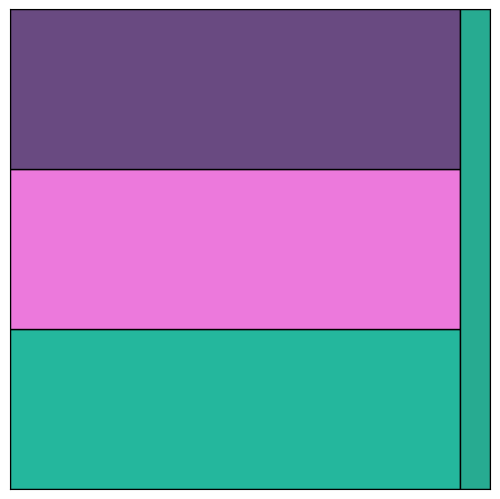

In [1]:
import pylab
from matplotlib.patches import Rectangle
from functools import reduce

class Treemap:
    def __init__(self, tree, iter_method, size_method, color_method):
        """create a tree map from tree, using itermethod(node) to walk tree,
        size_method(node) to get object size and color_method(node) to get its
        color"""

        self.ax = pylab.subplot(111,aspect='equal')
        pylab.subplots_adjust(left=0, right=1, top=1, bottom=0)
        self.ax.set_xticks([])
        self.ax.set_yticks([])

        self.size_method = size_method
        self.iter_method = iter_method
        self.color_method = color_method
        self.addnode(tree)

    def addnode(self, node, lower=[0,0], upper=[1,1], axis=0):
        axis = axis % 2
        self.draw_rectangle(lower, upper, node)
        width = upper[axis] - lower[axis]
        try:
            for child in self.iter_method(node):
                upper[axis] = lower[axis] + (width * float(size(child))) / size(node)
                self.addnode(child, list(lower), list(upper), axis + 1)
                lower[axis] = upper[axis]

        except TypeError:
            pass

    def draw_rectangle(self, lower, upper, node):
        print(lower, upper);
        r = Rectangle( lower, upper[0]-lower[0], upper[1] - lower[1],
                   edgecolor='k',
                   facecolor= self.color_method(node))
        self.ax.add_patch(r)


if __name__ == '__main__':
    # example using nested lists, iter to walk and random colors

    size_cache = {}
    def size(thing):
        if isinstance(thing, int):
            return thing
        if thing in size_cache:
            return size_cache[thing]
        else:
            size_cache[thing] = reduce(int.__add__, [size(x) for x in thing])
            return size_cache[thing]
    import random
    def random_color(thing):
        return (random.random(),random.random(),random.random())

    tree= ((5,5,5), 1)
    
    print(tree);

    Treemap(tree, iter, size, random_color)
    pylab.show()